<h2><center>Trabalho de conclusão do curso de Especialização em Ciência de Dados da Facens</center></h2>
<h3><center>Faculdade de Engenharia de Sorocaba</center></h3>

**Alunos:** 
<p>
<p>Dani Shizue Sakamoto - RA: 191219
<p>Mariana de Castro Pires Tavares Albuquerque - RA: 191224
<p>Tan Kim Wah - RA: 141462

<h2><center>Detecção de Máscara em Imagens/Vídeos</center></h2>

## 3.2.Execução do modelo gerado

Essa é a parte mais legal, onde consolida-se tudo que trabalhamos nos topicos anterior e visualiza isso na prática.

- Execução do modelo de mascara


- Video e imagem estática (foto).

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN

# Disable scientific notation for clarity
#np.set_printoptions(suppress=True)

path = r"C:/Users/KinWah/MASK_TCC/"

detector = MTCNN()
model = load_model(path + "MASK.h5")
cap = cv2.VideoCapture(0)
size = (160, 160)

In [ ]:
while True:

    ret, frame = cap.read()

    labels = []
    faces = detector.detect_faces(frame)

    people = 0

    for face in faces:

        x1, y1, w, h = face['box']
        # bug fix
        # #x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + w, y1 + h

        roi = frame[y1:y2, x1:x2]

        #RESIZE
        roi = cv2.resize(roi,size)

        if np.sum([roi])!=0:
            roi = (roi.astype('float')/255.0)
            roi = np.reshape(roi, [1,160,160,3])

            # PREDIÇÃO
            pred = model.predict([[roi]])
            
 
            pred = pred[0] ## pegando o vetor interno da classificação
            
            if pred[0] >= pred[1]:
                label = 'NO MASK'
                color = (0,0,255)
                people = people + 1
                

            else:
                label = 'MASK'
                color = (0,255,0)

            #label_position = (x1-100, y1+250)
            label_position = (x1, y1)
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
            cv2.putText(frame,label, label_position, cv2.FONT_HERSHEY_SIMPLEX,.6,color,2)

        else:
            cv2.putText(frame,'No Face Found',(20,60),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),2)

    cv2.putText(frame, "NO MASKS : " + str(people), (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    cv2.imshow('DETECTOR DE MASCARA', frame)

    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# INPUT PHOTOS

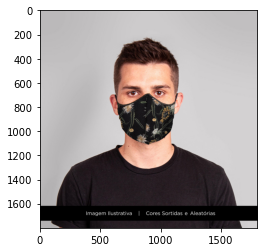

[[1.2913724e-10 1.0000000e+00]]


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot
from tensorflow.keras.models import load_model
from mtcnn.mtcnn import MTCNN
path = r"C:/Users/KinWah/MASK_TCC/"

#%matplotlib inline # if you are running this code in jupyter notebook
detector = MTCNN()
model = load_model(path + "MASK.h5")

size = (160, 160)
#img = cv2.imread('opencv_frame_5.png') # reads image 'opencv-logo.png' as grayscale
img = cv2.imread('homem_mask.png') # reads image 'opencv-logo.png' as grayscale
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pyplot.imshow(RGB_img)
pyplot.show()

frame = img
labels = []
faces = detector.detect_faces(frame)


for face in faces:

        x1, y1, w, h = face['box']
        # bug fix
        # #x1, y1 = abs(x1), abs(y1)
        x2, y2 = x1 + w, y1 + h

        roi = frame[y1:y2, x1:x2]
        roi = cv2.resize(roi,size)
        
people = 0
if np.sum([roi])!=0:
    roi = (roi.astype('float')/255.0)
    roi = np.reshape(roi, [1,160,160,3])

    # PREDIÇÃO
    pred = model.predict([[roi]])

    print(pred)
    pred = pred[0] ## pegando o vetor interno da classificação

    if pred[0] >= pred[1]:
        label = 'NO MASK'
        color = (0,0,255)
        people = people + 1


    else:
        label = 'MASK'
        color = (0,255,0)

    #label_position = (x1-100, y1+250)
    label_position = (x1, y1)
    cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
    cv2.putText(frame,label, label_position, cv2.FONT_HERSHEY_SIMPLEX,.6,color,2)
    
cv2.imshow('DETECTOR DE MASCARA', frame)

cv2.waitKey(0)
cv2.destroyAllWindows()